# <div style="text-align:center"> M.16 Segundo projeto - Previsão de renda </div>

## Etapa 1 CRISP - DM: Entendimento do negócio

   Uma instuição financeira, deseja conhecer melhor o perfil de renda de seus clientes para utilizações diversas, mas principalmente para reajuste de limite de cartão de crédito, para assim, tornar o processo mais rápido e menos burocrático.
   Para isto, conduziu um estudo com base na documentação de seus clientes, e pretende criar um modelo preditivo com dados que já possui.


## Etapa 2 Crisp-DM: Entendimento dos dados

### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis         | object       |
| id_cliente              |  Número exclusivo de identificação do cliente       | int
| sexo                    |  Determina o sexo do cliente  M = 'Masculino'; F = 'Feminino'                      | obeject (binário)
| posse_de_veiculo        |  Determina se cliente possui veiculo                | bool(binário)
| posse_de_imovel         |  Determina se cliente possui imovel                 | bool(binário)|
| qtd_filhos              |  A quantidade de filhos do cliente                  | int
| tipo_renda              |  Tipo de renda (ex: assaliariado, autônomo etc)                           | object
| educacao                |  nível de instrução do cliente  (ex: secundário, superior etc)                    | object|
| estado_civil            |  Estado civil do cliente (ex: solteiro, casado etc)                           | object|
| tipo_residencia         |  Define o tipo de residência do cliente (ex: casa/apartamento, com os pais etc)            | object|
| idade                   |  Define a idade do cliente em anos                  | int
| tempo_emprego           |  O quanto tempo no emprego atual em anos            | float
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                | float
| renda                   |  Valor numérico decimal da renda do cliente         | float





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [1]:
#Realizando a leitura do data frame.
df = pd.read_csv('./input/previsao_de_renda.csv')

NameError: name 'pd' is not defined

In [5]:
df

data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0      2015-01-01    F             False             True           0   
1      2015-01-01    M              True             True           0   
2      2015-01-01    F              True             True           0   
3      2015-01-01    F             False             True           1   
4      2015-01-01    M              True            False           0   
...           ...  ...               ...              ...         ...   
14588  2016-03-01    F             False             True           0   
14589  2016-03-01    F             False             True           0   
14590  2016-03-01    F              True             True           0   
14591  2016-03-01    M              True            False           0   
14592  2016-03-01    F             False             True           2   

             tipo_renda           educacao estado_civil tipo_residencia  \
0            Empresário         Secundário     Solteiro            Casa   
1           Assalariado  Superior completo       Casado            Casa   
2            Empresário  Superior completo       Casado            Casa   
3      Servidor público  Superior completo       Casado            Casa   
4           Assalariado         Secundário     Solteiro   Governamental   
...                 ...                ...          ...             ...   
14588        Empresário         Secundário     Solteiro            Casa   
14589       Pensionista  Superior completo     Solteiro            Casa   
14590       Assalariado  Superior completo       Casado            Casa   
14591        Empresário  Superior completo       Casado            Casa   
14592  Servidor público         Secundário        União            Casa   

       idade  tempo_emprego  qt_pessoas_residencia     renda  
0         26       6.602740                    1.0   8060.34  
1         28       7.183562                    2.0   1852.15  
2         35       0.838356                    2.0   2253.89  
3         30       4.846575                    3.0   6600.77  
4         33       4.293151                    1.0   6475.97  
...      ...            ...                    ...       ...  
14588     48      13.887671                    1.0   7990.58  
14589     57            NaN                    1.0  10093.45  
14590     45       7.832877                    2.0    604.82  
14591     36       4.298630                    2.0   3352.27  
14592     34       7.219178                    4.0   1160.99  

[14593 rows x 13 columns]

In [13]:
df.nunique()

data_ref                   15
sexo                        2
posse_de_veiculo            2
posse_de_imovel             2
qtd_filhos                  8
tipo_renda                  5
educacao                    5
estado_civil                5
tipo_residencia             6
idade                      47
tempo_emprego            2589
qt_pessoas_residencia       9
renda                    9786
dtype: int64

In [4]:
#Imprimindo informações importantes sobre o banco de dados;
df.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

#Quantidade de linhas 
print('Quantidade total de linhas:', len(df), '\n')

#Linhas duplicadas
print('Quantidade de linhas duplicadas:', df.duplicated().sum(), '\n')

#Quantidade após a limpeza dos dados
print('Quantidade após remoção das linhas duplicadas:', 
      len(df.drop_duplicates()), '\n')

#Limpando dados duplicados
df.drop_duplicates(inplace=True, ignore_index=True)
df.info()

Quantidade total de linhas: 15000 

Quantidade de linhas duplicadas: 407 

Quantidade após remoção das linhas duplicadas: 14593 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   sexo                   14593 non-null  object 
 2   posse_de_veiculo       14593 non-null  bool   
 3   posse_de_imovel        14593 non-null  bool   
 4   qtd_filhos             14593 non-null  int64  
 5   tipo_renda             14593 non-null  object 
 6   educacao               14593 non-null  object 
 7   estado_civil           14593 non-null  object 
 8   tipo_residencia        14593 non-null  object 
 9   idade                  14593 non-null  int64  
 10  tempo_emprego          12090 non-null  float64
 11  qt_pessoas_residencia  14593 non-null  float64
 12  renda                  14593

In [6]:
df.shape

(14593, 13)

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

* Com profile report é possível ter uma visão panorâmica de todos os dados em nosso data frame, assim tornando mais fácil o entendimento das variáveis como o tratamento nos passos futuros

In [8]:
prof = ProfileReport(df=df, 
                     minimal=False, 
                     explorative=True, 
                     dark_mode=True, 
                     orange_mode=True)
os.makedirs(name='./output', exist_ok=True)
prof.to_file('./output/renda_analysis.html')

prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

####  Estatísticas descritivas das variáveis quantitativas <a name="describe"></a>

<div style="text-align: right"

In [10]:
df.describe().transpose()

count         mean          std         min  \
qtd_filhos             14593.0     0.433290     0.746029    0.000000   
idade                  14593.0    43.868910    11.276626   22.000000   
tempo_emprego          12090.0     7.724567     6.718007    0.117808   
qt_pessoas_residencia  14593.0     2.207086     0.909117    1.000000   
renda                  14593.0  5698.140557  8314.021152  118.710000   

                               25%          50%          75%            max  
qtd_filhos                0.000000     0.000000     1.000000      14.000000  
idade                    34.000000    43.000000    53.000000      68.000000  
tempo_emprego             3.006164     6.013699    10.123288      42.906849  
qt_pessoas_residencia     2.000000     2.000000     3.000000      15.000000  
renda                  2018.880000  3488.410000  6379.570000  245141.670000

### Entendimento dos dados - Bivariadas




#### Matriz de correlação <a name="correlacao"></a>

<div style="text-align: right"

In [28]:
numeric_df = df.select_dtypes(include=[np.number])

# Calcula a matriz de correlação
correlation_matrix = numeric_df.corr()

# Mostra as últimas n linhas da matriz de correlação
correlation_matrix.tail(n=1)

qtd_filhos     idade  tempo_emprego  qt_pessoas_residencia  renda
renda    0.030296  0.023445       0.385014               0.048616    1.0

* A partir da matriz de correlação, descobrimos que, a varíavel com mairo relação com a `renda` é a `tempo_emprego` com o índice de correlação de 38%

D:\Anaconda2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


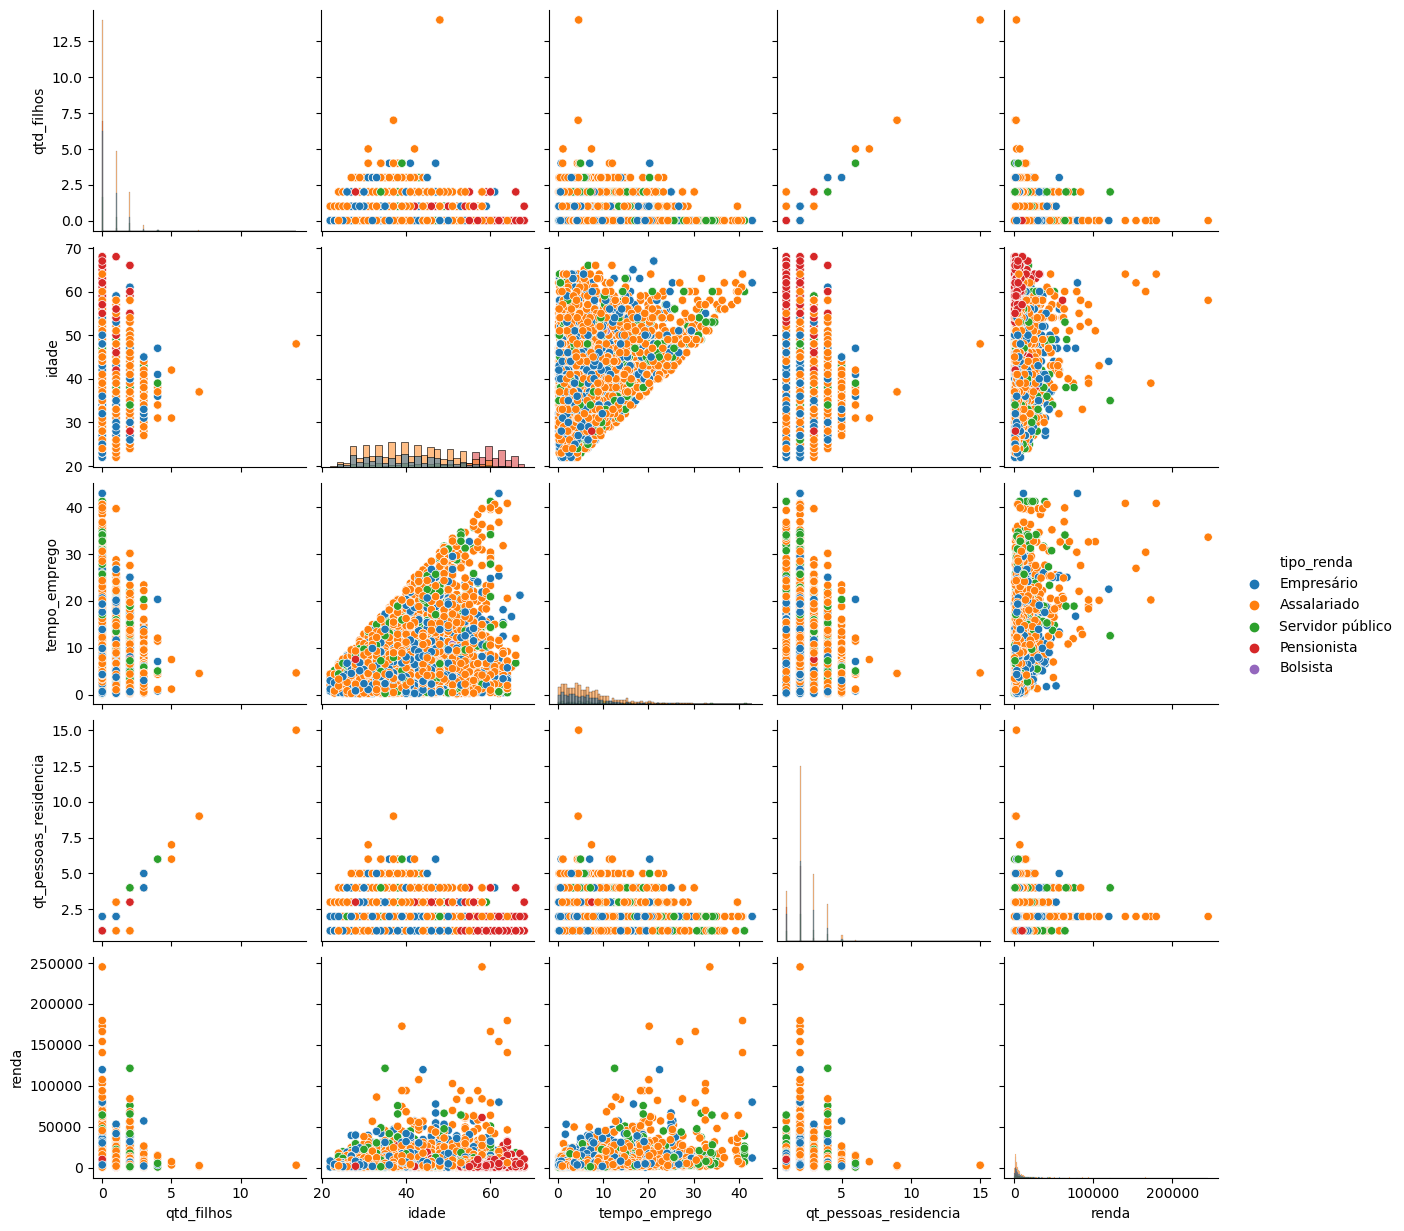

In [30]:
sns.pairplot(data=df, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'], 
             diag_kind='hist')

plt.show()

##### Clustermap

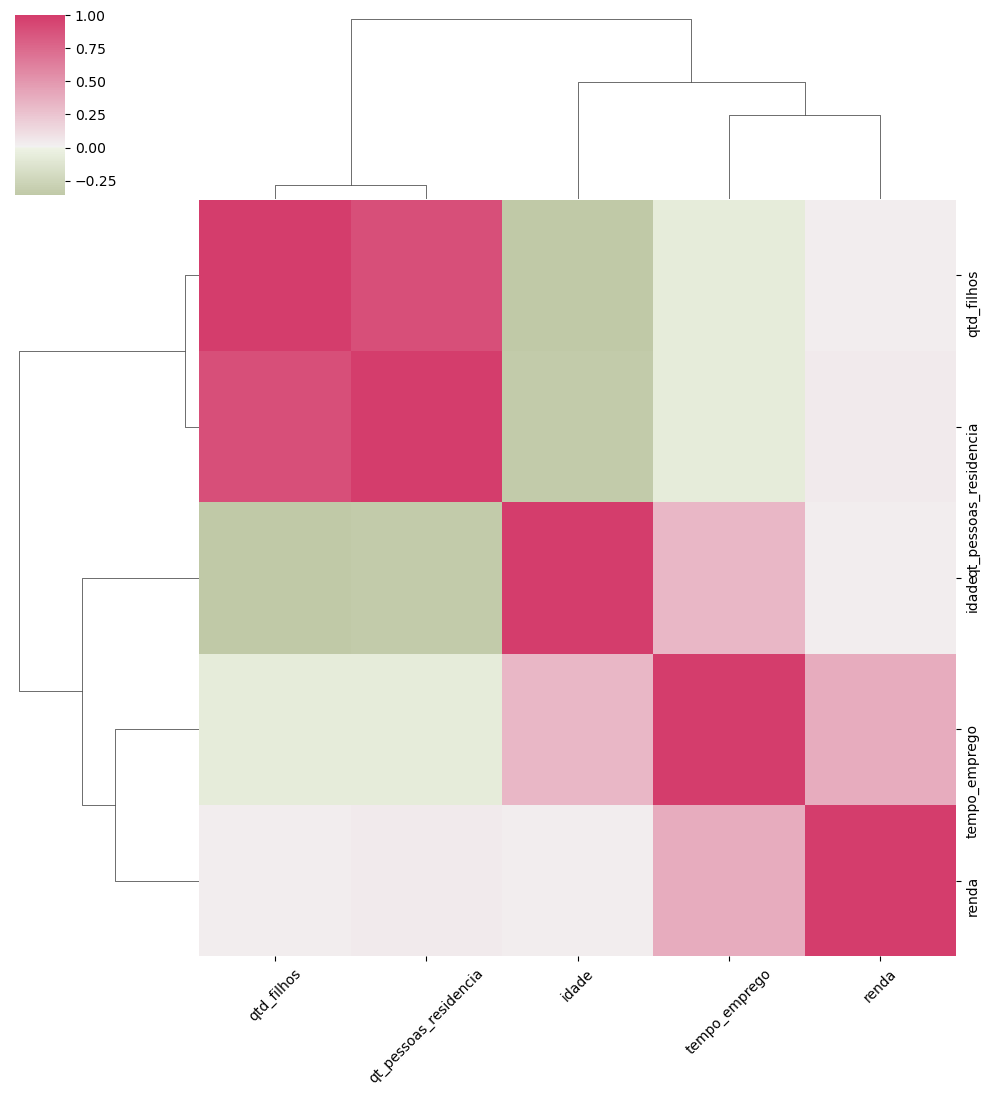

In [35]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

cmap = sns.diverging_palette(h_neg=100, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1, 
                             center='light')

ax = sns.clustermap(data=correlation_matrix, 
                    figsize=(10, 10), 
                    center=0, 
                    cmap=cmap)

plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=45)

plt.show()

 Através do cluestemap, apenas reforça a baixa correlação da renda com as demais variáveis

##### Linha de tendência 

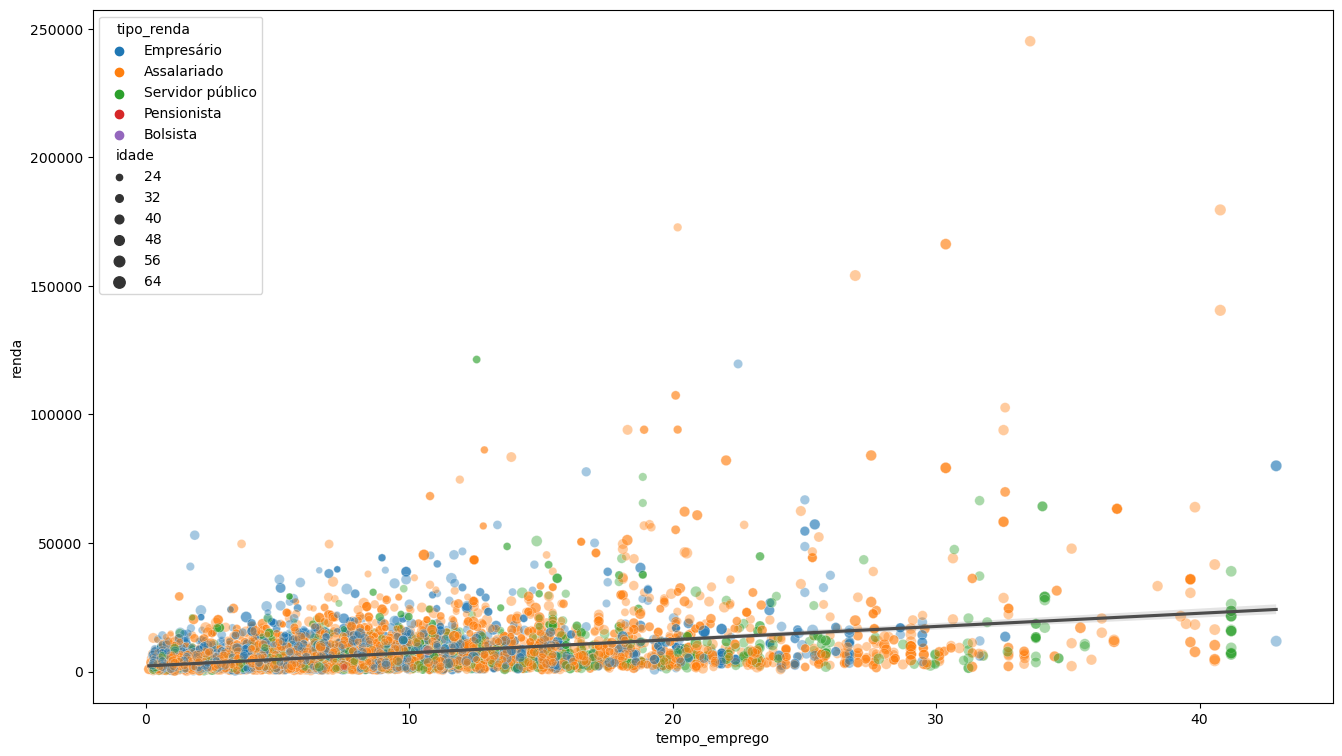

In [38]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',
                y='renda', 
                hue='tipo_renda', 
                size='idade',
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=df, 
            scatter=False, 
            color='.3')

plt.show()

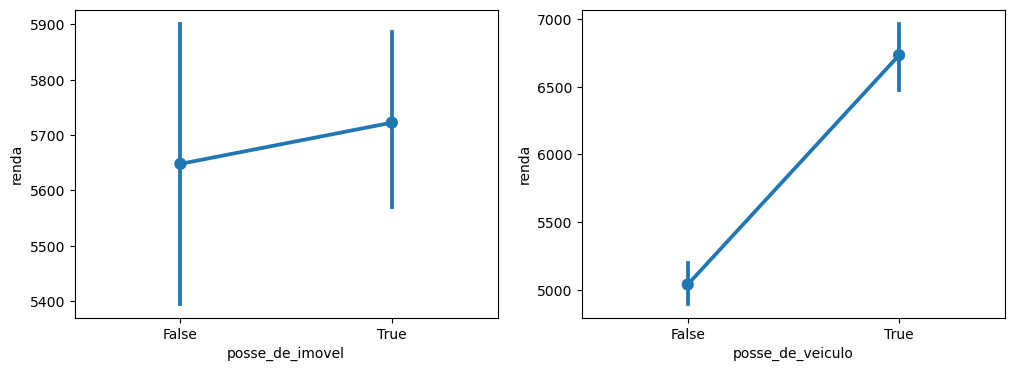

In [39]:
plt.rc('figure', figsize=(12,4))
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.pointplot(x='posse_de_imovel', 
              y='renda',  
              data=df, 
              dodge=True, 
              ax=axes[0])

sns.pointplot(x='posse_de_veiculo', 
              y='renda', 
              data=df, 
              dodge=True, 
              ax=axes[1])

plt.show()

* Através da anáçise das vaiáveis booleanas, percebe-se que, `Posse de veiculo` se mostra mais útil em relação a variável `Posse de imovel` evidenciada pela maior distância entre os intervalos de confiança.

C:\Users\Desktop\AppData\Local\Temp\ipykernel_18544\2382814777.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])


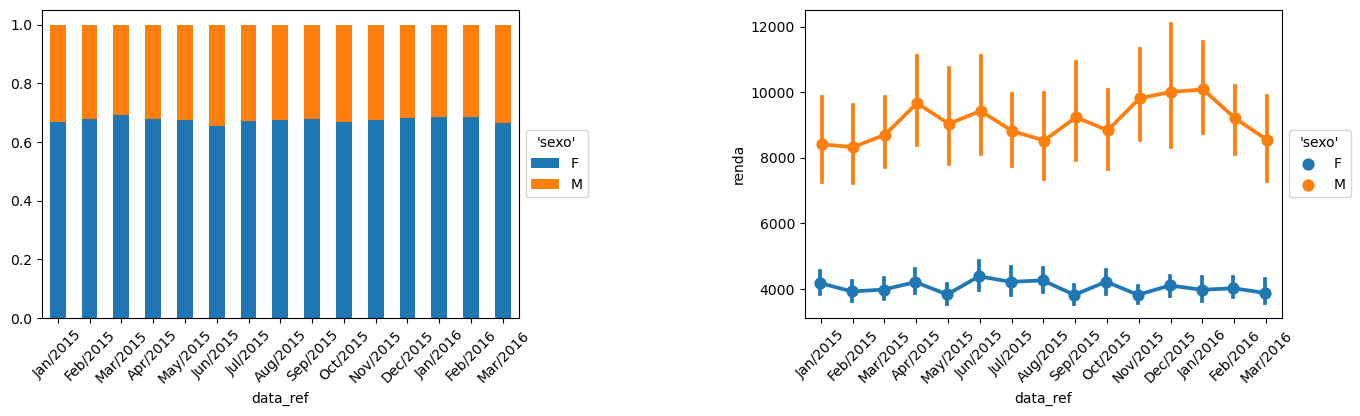

C:\Users\Desktop\AppData\Local\Temp\ipykernel_18544\2382814777.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])


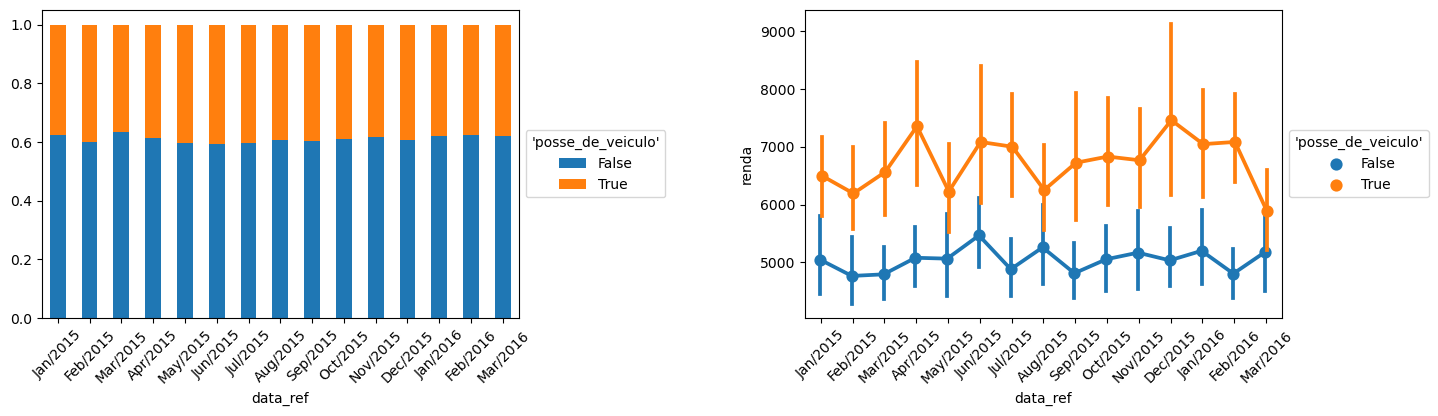

C:\Users\Desktop\AppData\Local\Temp\ipykernel_18544\2382814777.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])


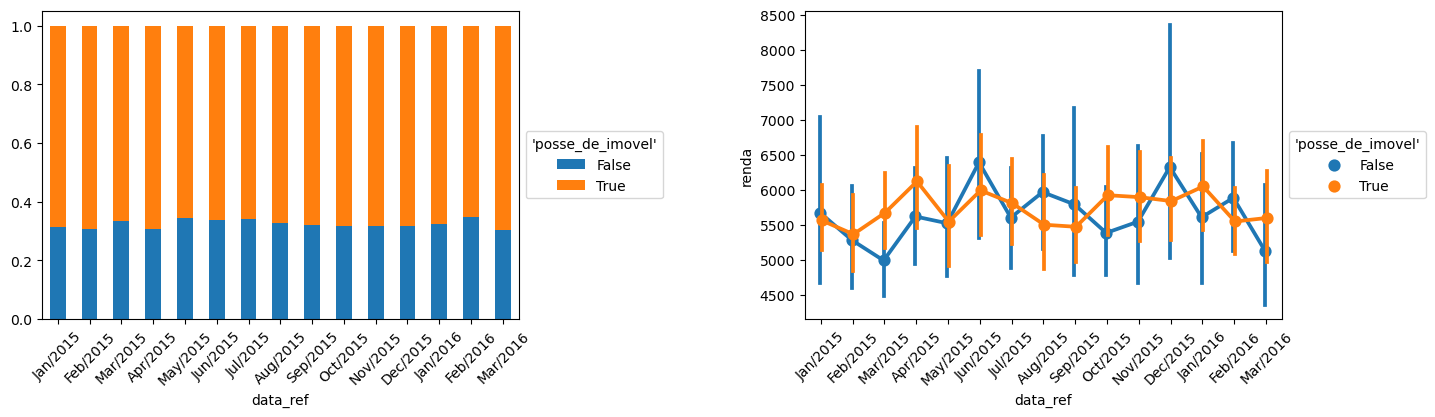

C:\Users\Desktop\AppData\Local\Temp\ipykernel_18544\2382814777.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])


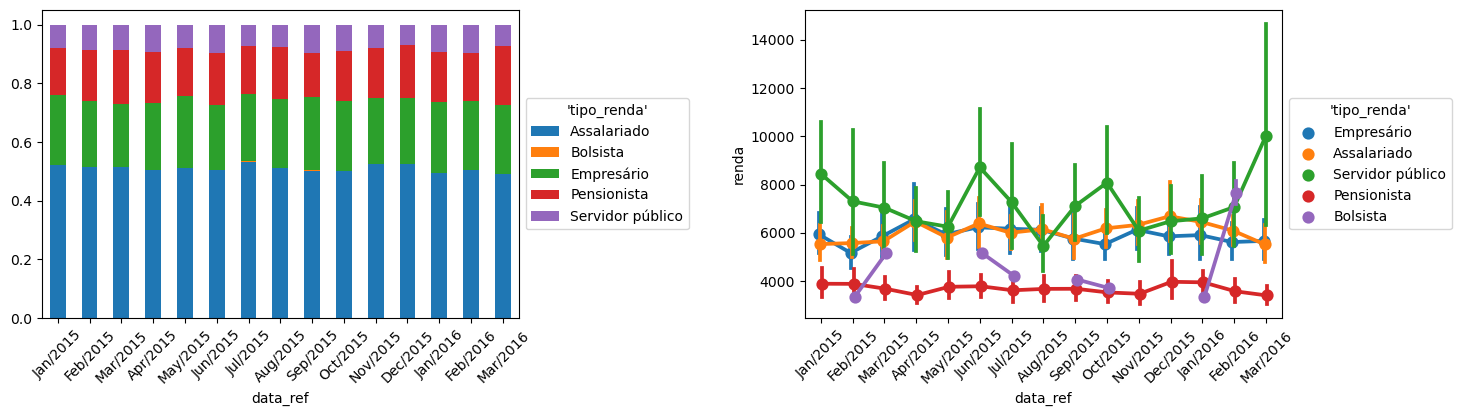

C:\Users\Desktop\AppData\Local\Temp\ipykernel_18544\2382814777.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])


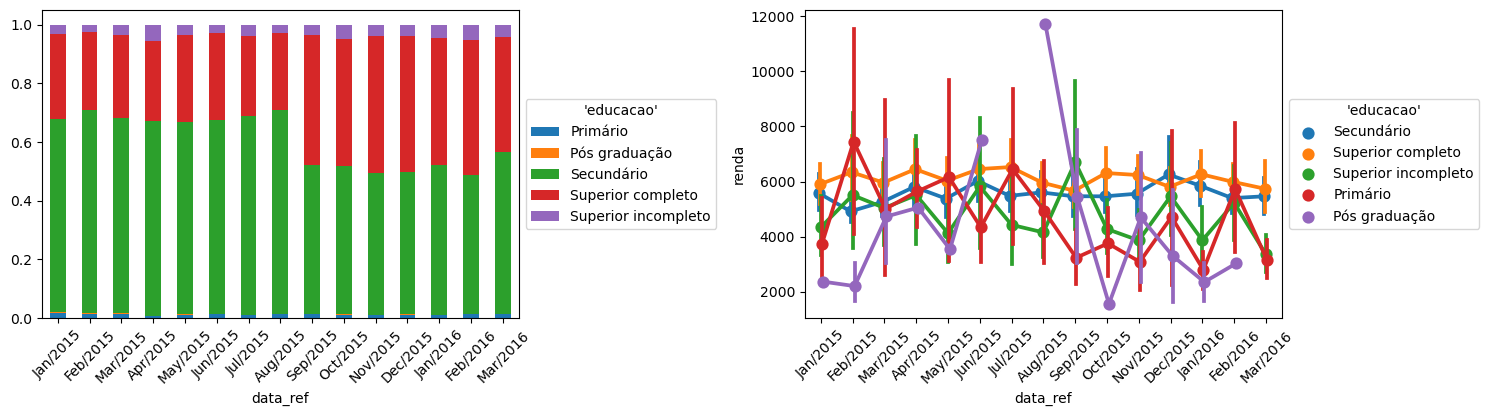

C:\Users\Desktop\AppData\Local\Temp\ipykernel_18544\2382814777.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])


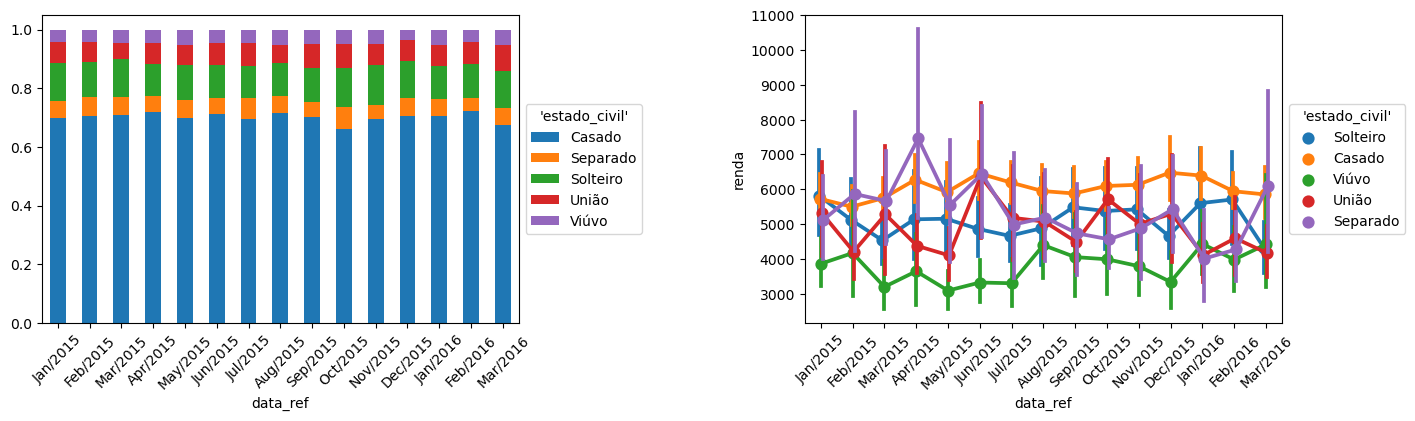

C:\Users\Desktop\AppData\Local\Temp\ipykernel_18544\2382814777.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])


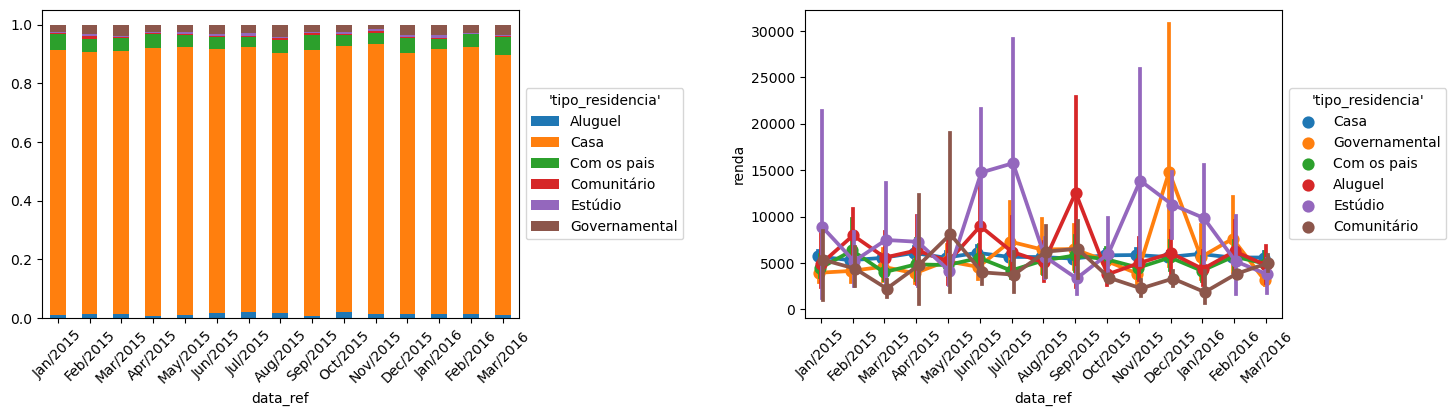

In [43]:
df['data_ref'] = pd.to_datetime(arg=df['data_ref'])

qualitativas = df.select_dtypes(include=['object', 'boolean']).columns

plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = df['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    
    # barras empilhadas:
    df_crosstab = pd.crosstab(index=df['data_ref'], 
                                 columns=df[col], 
                                 normalize='index')
    ax0 = df_crosstab.plot.bar(stacked=True, 
                                  ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    # perfis médios no tempo: 
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [48]:
if 'data_ref' in df.columns:
    df.drop(columns='data_ref', inplace=True)

# Remove linhas com valores NaN
df.dropna(inplace=True)

# Cria o DataFrame de resumo com tipos de dados, quantidade de valores não nulos e quantidade de categorias
summary_df = pd.DataFrame({
    'tipos_dados': df.dtypes,
    'qtd_valores': df.notna().sum(),
    'qtd_categorias': df.nunique()
})

summary_df

tipos_dados  qtd_valores  qtd_categorias
sexo                       object        12090               2
posse_de_veiculo             bool        12090               2
posse_de_imovel              bool        12090               2
qtd_filhos                  int64        12090               8
tipo_renda                 object        12090               5
educacao                   object        12090               5
estado_civil               object        12090               5
tipo_residencia            object        12090               6
idade                       int64        12090              46
tempo_emprego             float64        12090            2589
qt_pessoas_residencia     float64        12090               9
renda                     float64        12090            8126

### Conversão das variáveis categóricas em variáveis numéricas (dummies) 

In [51]:
df_dummies = pd.get_dummies(data=df)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12090 entries, 0 to 14592
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12090 non-null  bool   
 1   posse_de_imovel                12090 non-null  bool   
 2   qtd_filhos                     12090 non-null  int64  
 3   idade                          12090 non-null  int64  
 4   tempo_emprego                  12090 non-null  float64
 5   qt_pessoas_residencia          12090 non-null  float64
 6   renda                          12090 non-null  float64
 7   sexo_F                         12090 non-null  bool   
 8   sexo_M                         12090 non-null  bool   
 9   tipo_renda_Assalariado         12090 non-null  bool   
 10  tipo_renda_Bolsista            12090 non-null  bool   
 11  tipo_renda_Empresário          12090 non-null  bool   
 12  tipo_renda_Pensionista         12090 non-null  bool

In [53]:
(df_dummies.corr()['renda']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .rename(columns={'index':'var', 
                               'renda':'corr'})
              .style.bar(color=['darkred', 'darkgreen'], align=0)
)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


 A técnica escolhida foi o DecisionTreeRegressor, devido à sua facilidade com problemas de regressão, como a previsão de renda dos clientes. Além disso, árvores de decisão são fáceis de interpretar e permitem a identificação dos atributos mais relevantes para a previsão da variável-alvo, tornando-a uma boa escolha para o projeto.

### Divisão da base em treino e teste

In [54]:
X = df_dummies.drop(columns='renda')
y = df_dummies['renda']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


Quantidade de linhas e colunas de X: (12090, 29)
Quantidade de linhas de y: 12090
X_train: (9067, 29)
X_test: (3023, 29)
y_train: (9067,)
y_test: (3023,)


### Seleção de hiperparâmetros do modelo com for loop

In [55]:
score = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'score'])

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, 
                                         max_depth=x, 
                                         min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)
        
        score = pd.concat(objs=[score, 
                                pd.DataFrame({'max_depth': [x], 
                                              'min_samples_leaf': [y], 
                                              'score': [reg_tree.score(X=X_test, 
                                                                       y=y_test)]})], 
                          axis=0, 
                          ignore_index=True)
        
score.sort_values(by='score', ascending=False)

max_depth min_samples_leaf     score
213         8                4  0.417122
543        19                4  0.401091
243         9                4  0.401005
393        14                4  0.400246
245         9                6  0.399395
..        ...              ...       ...
27          1               28  0.056241
28          1               29  0.056241
29          1               30  0.056241
1           1                2  0.056241
0           1                1  0.056241

[600 rows x 3 columns]

### Rodando o modelo


In [56]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

# Visualização da árvore

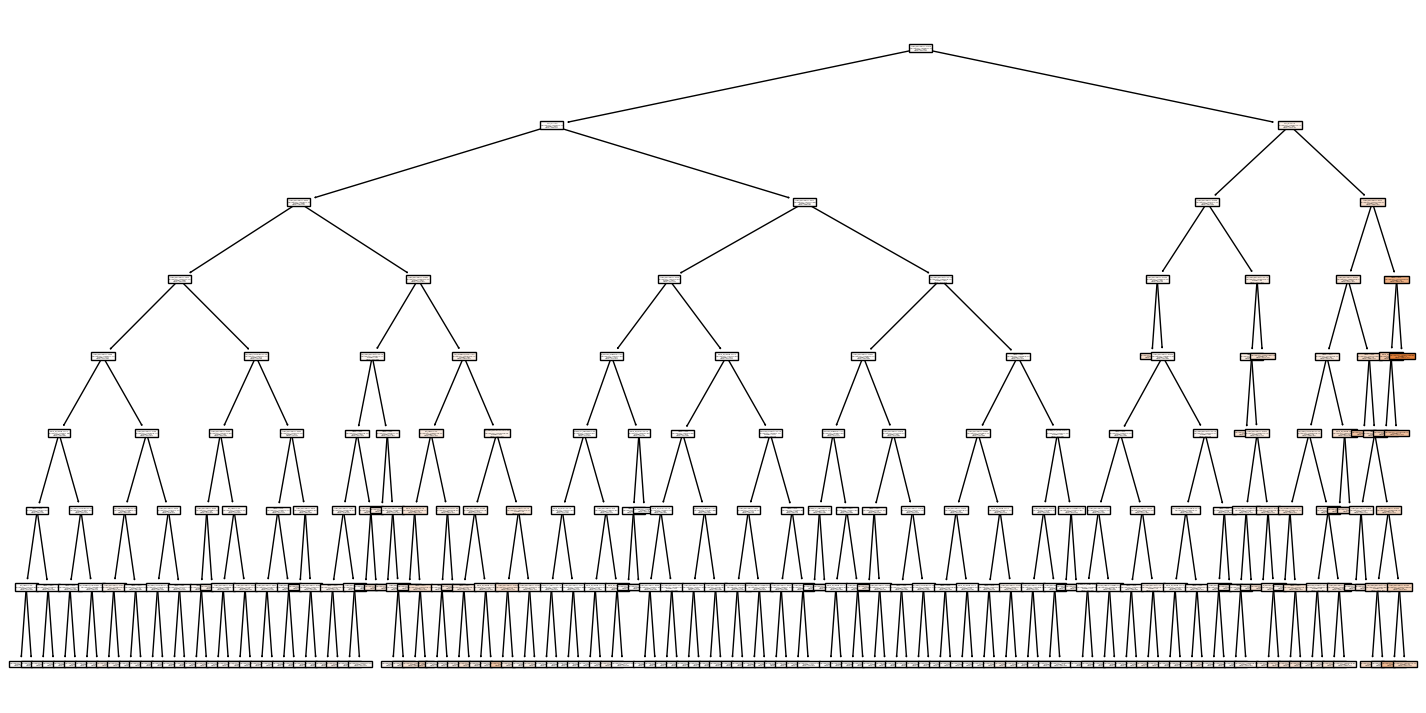

In [58]:
plt.rc('figure', figsize=(18, 9))

# Converte X.columns para uma lista
feature_names = X.columns.tolist()

# Plota a árvore de decisão
tp = tree.plot_tree(decision_tree=reg_tree, 
                    feature_names=feature_names, 
                    filled=True)

plt.show()

* Imprenssão da árvore 

In [59]:
text_tree_print = tree.export_text(decision_tree=reg_tree)

print(text_tree_print)

|--- feature_4 <= 17.08
|   |--- feature_6 <= 0.50
|   |   |--- feature_4 <= 6.93
|   |   |   |--- feature_4 <= 4.54
|   |   |   |   |--- feature_4 <= 1.69
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 52.50
|   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |--- value: [3237.54]
|   |   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |   |--- value: [1415.27]
|   |   |   |   |   |   |--- feature_3 >  52.50
|   |   |   |   |   |   |   |--- feature_3 <= 56.00
|   |   |   |   |   |   |   |   |--- value: [6817.46]
|   |   |   |   |   |   |   |--- feature_3 >  56.00
|   |   |   |   |   |   |   |   |--- value: [4458.54]
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |--- feature_3 <= 54.50
|   |   |   |   |   |   |   |   |--- value: [4821.44]
|   |   |   |   |   |   |   |--- feature_3 >  54.50
|   |   |   |   |   |   |   |   |--

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [60]:
r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (𝑅2) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de treino é: 0,60
O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de teste é: 0,42 



In [61]:
df['renda_predict'] = np.round(reg_tree.predict(X), 2)
df[['renda', 'renda_predict']]

renda  renda_predict
0      8060.34        3127.79
1      1852.15        7146.41
2      2253.89        2465.37
3      6600.77        3654.23
4      6475.97        5465.31
...        ...            ...
14587  1592.57       13209.09
14588  7990.58        6350.97
14590   604.82        4341.42
14591  3352.27        5465.31
14592  1160.99        3127.79

[12090 rows x 2 columns]

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [62]:
entrada = pd.DataFrame([{'sexo': 'M', 
                         'posse_de_veiculo': False, 
                         'posse_de_imovel': True, 
                         'qtd_filhos': 1, 
                         'tipo_renda': 'Assalariado', 
                         'educacao': 'Superior completo', 
                         'estado_civil': 'Solteiro', 
                         'tipo_residencia': 'Casa', 
                         'idade': 34, 
                         'tempo_emprego': None, 
                         'qt_pessoas_residencia': 1}])
entrada = pd.concat([X, pd.get_dummies(entrada)]).fillna(value=0).tail(1)
print(f"Renda estimada: R${str(np.round(reg_tree.predict(entrada).item(), 2)).replace('.', ',')}")

Renda estimada: R$3671,41
